In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate
from scipy import stats
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings('ignore')

In [22]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/fig4/volterra/exp_*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,generation_model,plasticity_coeff_init,plasticity_model,moving_avg_window,data_dir,log_dir,trainable_coeffs,exp_name,reward_term,layer_sizes
0,0.000595,-0.000818,-0.000677,0.001305,0.000373,-0.000600,0.000831,0.001128,-0.000689,0.002647,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
1,-0.008891,-0.012538,-0.005689,0.000057,-0.000459,-0.000305,-0.005066,-0.012358,-0.000032,0.016444,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
2,-0.013072,-0.020446,-0.000206,-0.001320,-0.000063,-0.000135,-0.005101,-0.021184,-0.000596,0.022261,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
3,-0.015342,-0.022874,-0.000365,-0.004705,0.000317,0.000091,-0.003133,-0.024057,0.000223,0.026618,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
4,-0.016122,-0.023495,0.001336,-0.010657,-0.000201,-0.000059,0.000058,-0.024210,-0.000139,0.029459,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.013265,-0.015341,0.001390,-0.004263,-0.000368,-0.000280,0.000775,-0.001693,0.000196,0.030822,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
101,-0.013269,-0.014975,-0.001090,-0.004374,-0.000286,0.000496,0.000557,-0.001849,-0.001432,0.030885,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
102,-0.013736,-0.013804,-0.000051,-0.000015,-0.000170,-0.000375,-0.000092,-0.000434,-0.000125,0.031033,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
103,-0.013431,-0.013650,0.001319,-0.001703,0.000329,0.000339,-0.000115,0.000115,-0.000655,0.028440,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"


In [23]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)
num_epochs = int(np.squeeze(df["num_epochs"].unique()))

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["flyid"].unique()

['epoch', 'loss', 'train_time', 'percent_deviance', 'r2_weights', 'r2_activity', 'num_train', 'num_eval', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'flyid', 'fit_data', 'neural_recording_sparsity', 'measurement_noise_scale', 'input_firing_mean', 'input_variance', 'l1_regularization', 'generation_coeff_init', 'generation_model', 'plasticity_coeff_init', 'plasticity_model', 'moving_avg_window', 'data_dir', 'log_dir', 'trainable_coeffs', 'exp_name', 'reward_term', 'layer_sizes']


array([ 1, 10,  2,  3,  4,  5,  6,  7,  8,  9])

In [24]:
df_subset = df.loc[(df['epoch'] == num_epochs)]
for coeff in coeffs:
    if df_subset[coeff].sum() == 0:
        df_subset = df_subset.drop(coeff, axis=1)

df_subset.head()

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,generation_model,plasticity_coeff_init,plasticity_model,moving_avg_window,data_dir,log_dir,trainable_coeffs,exp_name,reward_term,layer_sizes
20,-0.005134,-0.004499,0.010370,-0.000448,0.000067,-0.000091,0.000014,-0.023210,-0.000238,0.005447,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
41,-0.003856,-0.003252,0.009820,-0.001037,-0.000117,0.000011,-0.000247,-0.017517,-0.000081,0.000214,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
62,-0.008389,-0.010192,0.009669,-0.003466,-0.000214,-0.000568,-0.000015,-0.026175,-0.000146,0.015286,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
83,-0.005667,-0.006031,0.009638,-0.003292,-0.000256,-0.000747,0.000075,-0.023849,-0.000022,0.009683,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"
104,-0.010861,-0.014304,0.010704,-0.000242,0.000056,-0.000620,0.000266,-0.024591,-0.000632,0.018759,...,volterra,random,volterra,10,../data/,logs/,27,fig4,expected-reward,"[2, 10, 1]"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


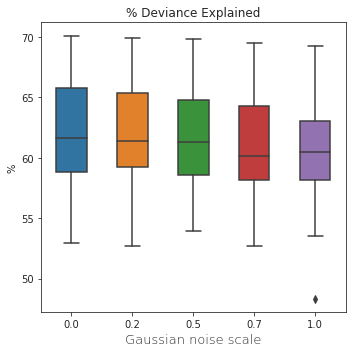

In [30]:
style = "ticks"
sns.set_style(style)

fig, ax = plt.subplots(figsize=(5, 5))

ax.set_title('% Deviance Explained')

box_plot = sns.boxplot(data=df_subset, x="measurement_noise_scale", y="percent_deviance", width=0.5)
ax.set_xlabel("Gaussian noise scale", fontsize=13, fontweight="light")
ax.set_ylabel("%")
ax.legend().remove()

plt.tight_layout()
plt.savefig("fig4-noise.png", dpi=500)